In [63]:
from scipy import stats
import scipy.io
from matplotlib import cm
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import timedelta
import astropy.constants as const
import sunpy
from sunpy.time import parse_time
import sunpy.time
import time
import pickle
import seaborn as sns
import os
import urllib
import json
import warnings
import importlib
import heliopy.spice as spice
import heliopy.data.spice as spicedata
import astropy
import astropy.units as u

import sunpy.data.sample
import sunpy.map


from sunpy.net.helioviewer import HelioviewerClient
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sunpy.map import Map


from astropy.units import Quantity



## AIA sample image

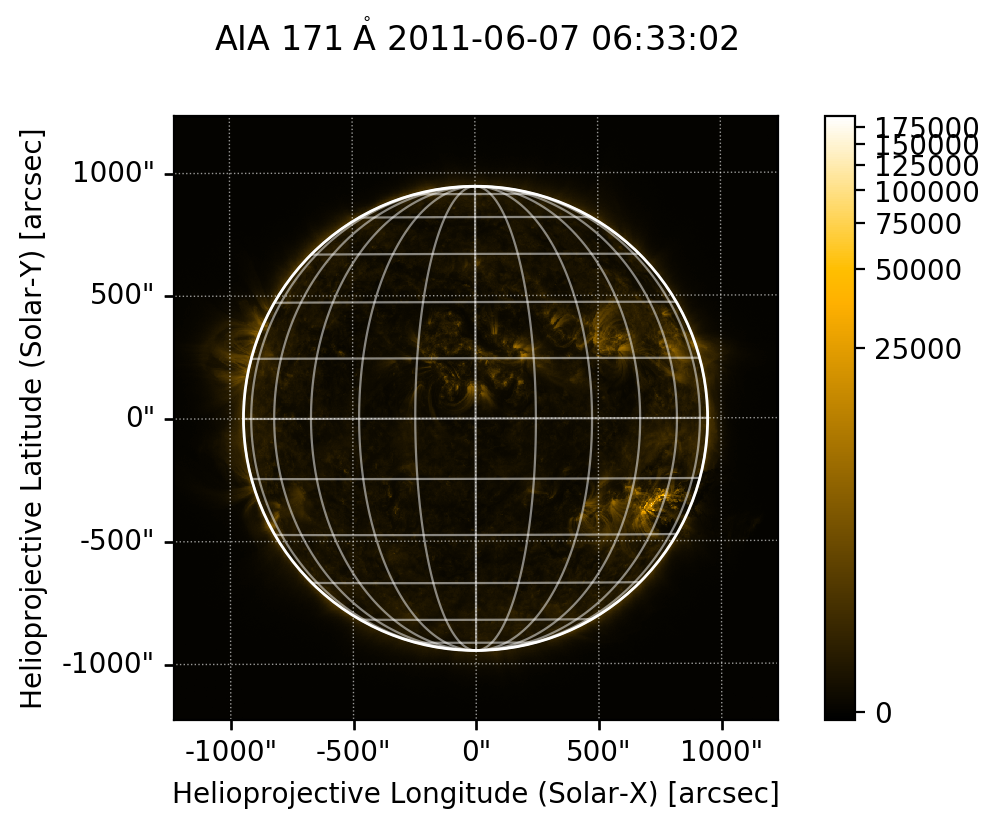

In [64]:

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

fig = plt.figure(dpi=200)
ax = plt.subplot(111, projection=aia)

aia.plot()
aia.draw_limb()
aia.draw_grid()
plt.colorbar()

plt.show()


## SDO HMI and LASCO images from JHelioViewer

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.08file/s]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hg

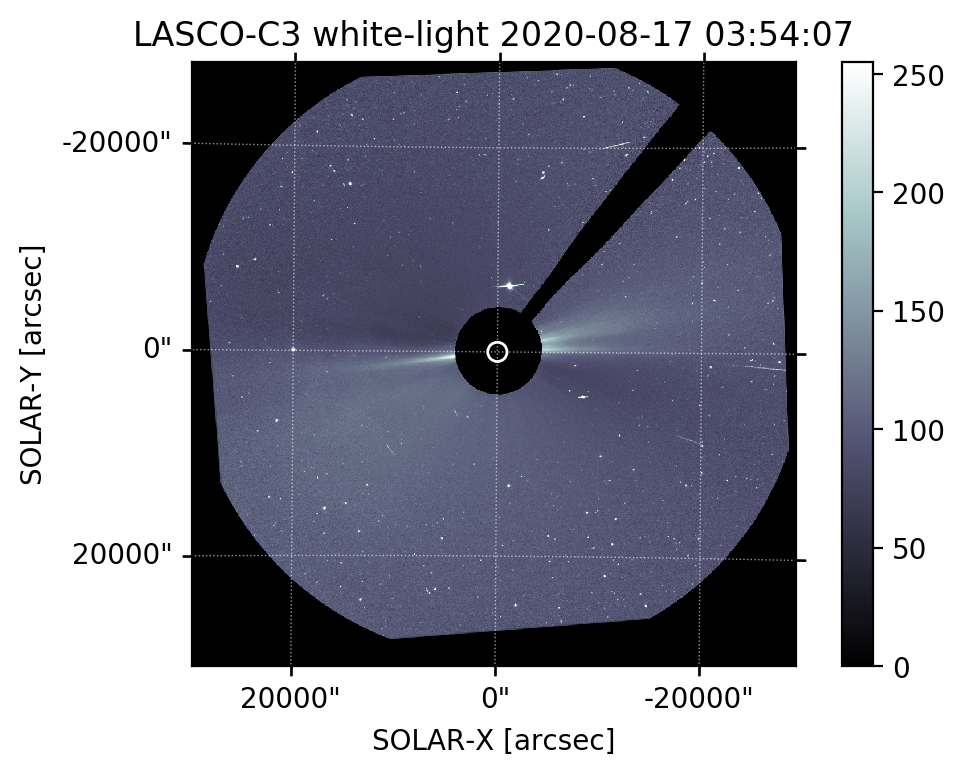

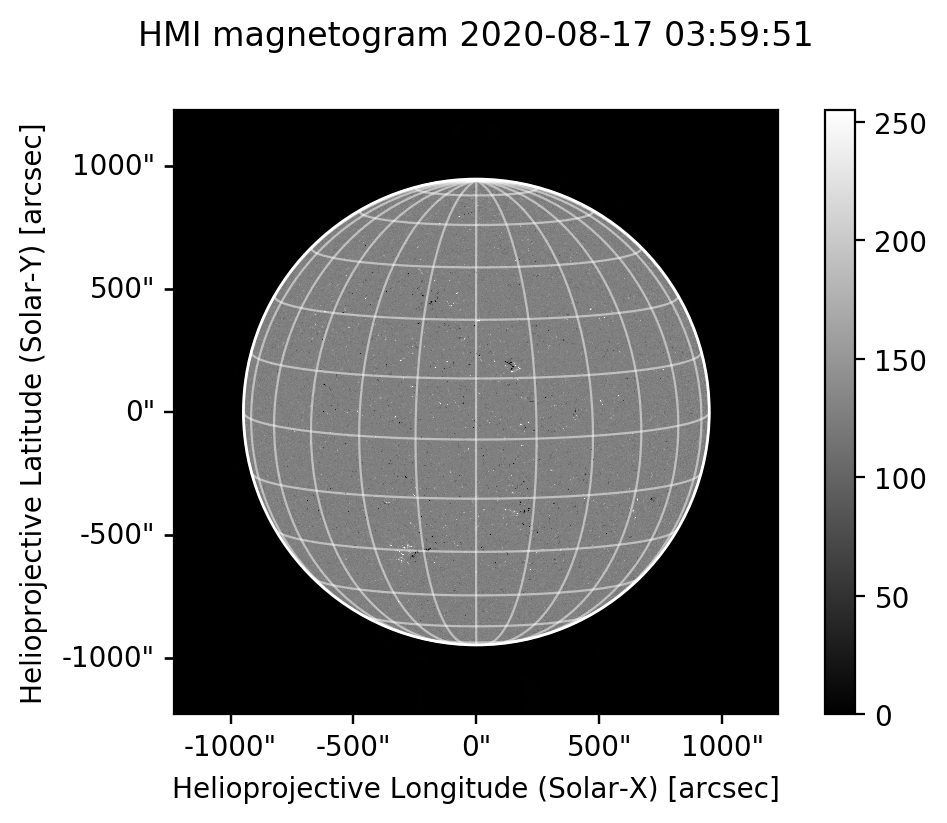

In [83]:
#https://docs.sunpy.org/en/latest/guide/acquiring_data/helioviewer.html


############################### LASCO
hv = HelioviewerClient()


# copy this in the console to get a list of viable data sources
#hv.get_data_sources())

t1='2020/08/17 04:00:00'

#file = hv.download_jp2('2020/08/01', observatory="SDO", instrument="AIA",    measurement="304") 
#file = hv.download_jp2('2017/05/23', observatory="STEREO_A", instrument="SECCHI", detector='COR2'  ,  measurement="white-light") 
#file = hv.download_jp2('2012/07/23 04:00:00', observatory="SOHO", instrument="LASCO", detector='C3'  ,  measurement="white-light") 
file = hv.download_jp2(t1, observatory="SOHO", instrument="LASCO", detector='C3',  measurement="white-light") 


las = Map(file)  

lasrot = las.rotate(angle=2 * u.deg)

fig = plt.figure(1, dpi=200)
ax = plt.subplot(111, projection=lasrot)

lasrot.plot()
lasrot.draw_limb()
#las.draw_grid()
plt.colorbar()


################################### HMI
hv = HelioviewerClient()
filepath = hv.download_jp2(t1, observatory='SDO', instrument='HMI', measurement='magnetogram')
hmi = Map(filepath)

fig = plt.figure(2,dpi=200)
ax = plt.subplot(111,projection=hmi)

hmi.plot()
plt.grid(None)

hmi.draw_limb()
hmi.draw_grid()
plt.colorbar()



#xrange = Quantity([200, 550], 'arcsec')
#yrange = Quantity([-400, 200], 'arcsec')
#hmi.submap(xrange, yrange).peek()

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_obs') [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Changed DATE-OBS from '2020/08/17T03:54:07.846' to '2020-08-17T03:54:07.846''. [astropy.wcs.wcs]
('hgln_obs', 'hglt_obs', 'dsun_obs')
('crln_obs', 'crlt_obs', 'dsun_ob

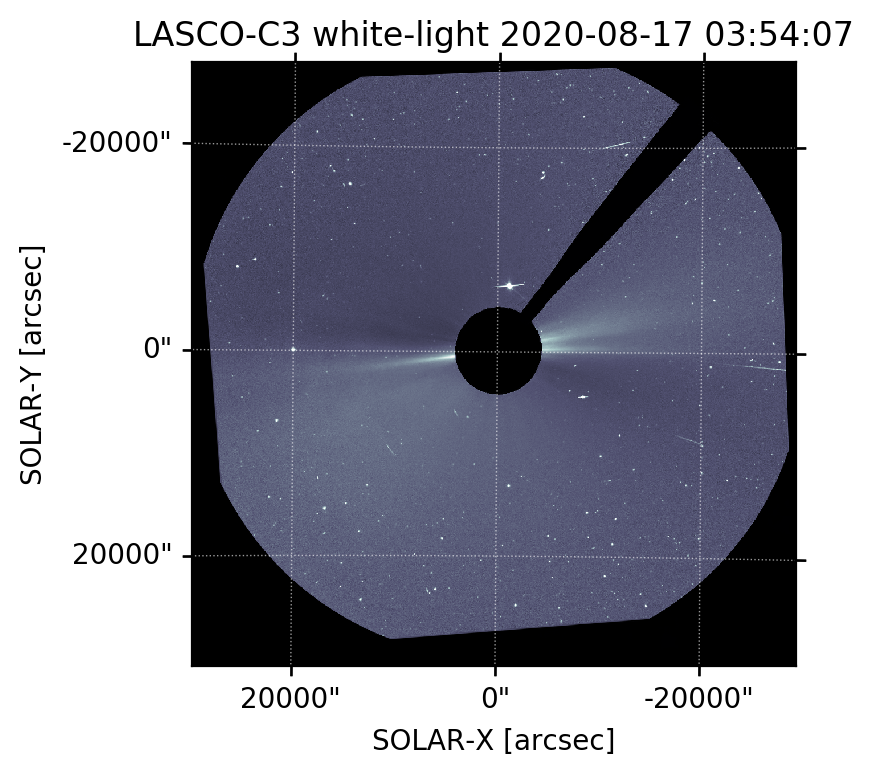

In [72]:

lasrot = las.rotate(angle=2 * u.deg)

fig = plt.figure(1, dpi=200)
ax = plt.subplot(111, projection=lasrot)

lasrot.plot()
